In [1]:
import numpy as np
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Customer_Reviews.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Score', ylabel='Density'>

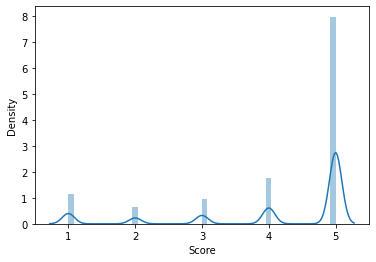

In [4]:
sns.distplot(df['Score'])

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.sample(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
433450,433451,B001E6IUJM,A2RKZTRZVJR0W5,Amzoony,1,1,5,1211155200,Kellogg's Smart Start Cereal,Smart Start is pretty tasty for a health cerea...
124993,124994,B001M0G2PO,A3NJDIZOX048XM,One who strives to be healthy,4,21,1,1251936000,Dislike the taste of this product.,This product has a very strong taste that over...
364831,364832,B000PDY3HI,A2CC963DUW4CHR,"fraphant ""Frank""",1,1,4,1330560000,Pop!,very convenient package for my popcorn maker.<...
526800,526801,B001FA1L8O,A1B5MK8PO6OPBY,Rowernurse,0,0,5,1264809600,THE best pancake and waffle mix,You really have to try this. It makes tasty so...
2864,2865,B002BB8POY,A3N197JTY971TZ,"J. Le Blanche ""Novo-Andina""",5,8,5,1269561600,Safety Instructions for coca tea,High quality coca products do not have a paper...


In [7]:
df['Text'][27]

'I was so glad Amazon carried these batteries.  I have a hard time finding them elsewhere because they are such a unique size.  I need them for my garage door opener.<br />Great deal for the price.'

In [8]:
text_blob_object=TextBlob(df['Text'][27])
print(text_blob_object.sentiment)

Sentiment(polarity=0.14583333333333331, subjectivity=0.7604166666666666)


In [9]:
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

df['Sentiment_Polarity'] = df['Text'].apply(find_polarity)

In [10]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment_Polarity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.483333


In [11]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'Sentiment_Polarity'],
      dtype='object')

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Score', ylabel='Sentiment_Polarity'>

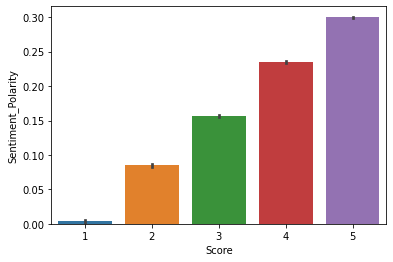

In [12]:
sns.barplot(df['Score'],df['Sentiment_Polarity'])

In [13]:
most_negative=df[df.Sentiment_Polarity == -1].Text.head()
print(most_negative)

545     These chips are nasty.  I thought someone had ...
1083    All my fault. I thought this would be a carton...
1832    Pop Chips are basically a horribly over-priced...
2087    I do not consider Gingerbread, Spicy Eggnog, C...
2763    This popcorn has alot of hulls I order 4 bags ...
Name: Text, dtype: object


In [14]:
df['Text'][545]

'These chips are nasty.  I thought someone had spilled a drink in the bag, no the chips were just soaked with grease.  Nasty!!'

In [15]:
most_positive=df[df.Sentiment_Polarity == 1].Text.head()
print(most_positive)

106     not what I was expecting in terms of the compa...
223     This is an excellent tea.  One of the best I h...
338     I like a lot of sesame oil and use it in salad...
796     My mother and father were the recipient of the...
1031    The Kelloggs Muselix are delicious and the del...
Name: Text, dtype: object


In [16]:
df['Text'][106]

"not what I was expecting in terms of the company's reputation for excellent home delivery products"